# Steam Games, Reviews, and Rankings.
### Name: Renee Szeghy

#### Link to dataset: [Steam Games, Reviews, and Rankings.](https://www.kaggle.com/datasets/mohamedtarek01234/steam-games-reviews-and-rankings?select=steam_game_reviews.csv)

#### Introduction
The machine learning algorithms that will be used in this will be Naive Bayes and Logistic Regression. I will be trying to see if one could predict whether someone would recommend or not recommend that someone plays a game based on a few factors, including the game, the overall ratings of the game, how many hours the user played the game for, and whether or not other people find the review helpful or funny.

In [1]:
from typing import List, Dict, Tuple, Callable, Union
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
games_description_df = pd.read_csv('Steam_Games_Data/games_description.csv')

In [3]:
games_rev_df = pd.read_csv('Steam_Games_Data/steam_game_reviews.csv', dtype='str')

#### Game Reviews Dataframe
The Game Reviews Dataframe has the following columns:

    review: The content of the player’s review
    hours_played: Total hours the player has spent on the game
    helpful: Number of users who found the review helpful
    funny: Number of users who found the review funny
    recommendation: Whether the player recommended or did not recommend the game
    date: Date of the review
    game_name: Name of the game being reviewed
    username: Username of the player who wrote the review

Descriptions are written by the creator of the dataset.

In [4]:
display(games_rev_df)

,review,hours_played,helpful,funny,recommendation,date,game_name,username
0,The game itself is also super fun. The PvP and...,39.9,"1,152",13,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Sentinowl\n224 products in account
1,Never cared much about Warhammer until this ga...,91.5,712,116,Recommended,13 September,"Warhammer 40,000: Space Marine 2",userpig\n248 products in account
2,A salute to all the fallen battle brothers who...,43.3,492,33,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Imparat0r\n112 products in account
3,this game feels like it was made in the mid 20...,16.8,661,15,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Fattest_falcon
4,Reminds me of something I've lost. A genuine g...,24.0,557,4,Recommended,12 September,"Warhammer 40,000: Space Marine 2",Jek\n410 products in account
...,...,...,...,...,...,...,...,...
992148,2022 Early Access Review Loads of fun!Initiall...,4.2,1,0,Recommended,"August 4, 2022",Turbo Golf Racing,"Fatal Exit\n1,902 products in account"
992149,2022 Early Access Review Great fun!,8.5,1,0,Recommended,"August 4, 2022",Turbo Golf Racing,cleybaR
992150,2022 Early Access Review Excellent pick up and...,83.3,2,0,Recommended,"August 4, 2022",Turbo Golf Racing,Sim\n600 products in account
992151,2022 Early Access Review This game is so much ...,3.8,1,0,Recommended,"August 4, 2022",Turbo Golf Racing,Fatboybadboy


In [5]:
games_rev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992153 entries, 0 to 992152
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   review          991650 non-null  object
 1   hours_played    992153 non-null  object
 2   helpful         992153 non-null  object
 3   funny           992153 non-null  object
 4   recommendation  992153 non-null  object
 5   date            992153 non-null  object
 6   game_name       992153 non-null  object
 7   username        992072 non-null  object
dtypes: object(8)
memory usage: 60.6+ MB


The review and username columns will both be removed. Additionally, the columns need to have their data types fixed.

#### Game Descriptions Dataframe
The Game Descriptions Dataframe has the following columns:
    
    name: Game title
    short_description: Brief description of the game
    long_description: Detailed description of the game
    genres: List of genres the game belongs to
    minimum_system_requirement: Minimum system requirements to run the game
    recommend_system_requirement: Recommended system requirements
    release_date: Game release date
    developer: Developer of the game
    publisher: Publisher of the game
    overall_player_rating: Overall player rating for the game
    number_of_reviews_from_purchased_people: Number of reviews from users who purchased the game
    number_of_english_reviews: Number of reviews written in English
    link: URL to the game page on Steam

Descriptions are written by the creator of the dataset.

In [6]:
display(games_description_df)

,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)","51,931",https://store.steampowered.com/app/2358720/Bla...
1,Counter-Strike 2,"For over two decades, Counter-Strike has offer...",About This Game\n\t\t\t\t\t\t\tFor over two de...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","21 Aug, 2012",['Valve'],['Valve'],Very Positive,"(8,313,603)","2,258,990",https://store.steampowered.com/app/730/Counter...
2,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
3,Cyberpunk 2077,"Cyberpunk 2077 is an open-world, action-advent...",About This Game\nCyberpunk 2077 is an open-wor...,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"10 Dec, 2020",['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,"(680,264)","324,124",https://store.steampowered.com/app/1091500/Cyb...
4,ELDEN RING,THE CRITICALLY ACCLAIMED FANTASY ACTION RPG. R...,About This Game\nTHE CRITICALLY ACCLAIMED FANT...,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"25 Feb, 2022","['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,"(705,261)","491,741",https://store.steampowered.com/app/1245620/ELD...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,MXGP PRO,Adjust your bike's configuration like a mechan...,About This Game\n\t\t\t\t\t\t\tThe official vi...,"['Simulation', 'Racing', 'Sports', 'Motocross'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"29 Jun, 2018",['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,(777),433,https://store.steampowered.com/app/798290/MXGP...
286,MXGP 2019 - The Official Motocross Videogame,Experience the excitement of the 2019 season f...,About This Game\n\t\t\t\t\t\t\tThe official Mo...,"['Simulation', 'Racing', 'Sports', 'Motorbike'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"27 Aug, 2019",['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,(90% of 858) All Time,446,https://store.steampowered.com/app/1018160/MXG...
287,Ride 2,The fastest and most iconic bikes in the world...,About This Game\n\t\t\t\t\t\t\tWelcome to the ...,"['Racing', 'Sports', 'Simulation', 'Motorbike'...",['OS *: Windows® 7 SP1 / Windows® 8 / Windows®...,['OS *: Windows® 7 SP1 64-Bit / Windows® 8 64-...,"7 Oct, 2016",['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,"(86% of 2,335) All Time","1,045",https://store.steampowered.com/app/477770/Ride...
288,Tanuki Sunset,Master the longboard as you drift through stun...,About This Game\nGrab Your Longboard and Race ...,"['Racing', 'Action', 'Indie', 'Sports', 'Adven...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...","4 Dec, 2020",['Rewind Games'],['Rewind Games'],Very Posit

In [7]:
games_description_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   name                                     290 non-null    object
 1   short_description                        277 non-null    object
 2   long_description                         290 non-null    object
 3   genres                                   290 non-null    object
 4   minimum_system_requirement               290 non-null    object
 5   recommend_system_requirement             290 non-null    object
 6   release_date                             290 non-null    object
 7   developer                                290 non-null    object
 8   publisher                                290 non-null    object
 9   overall_player_rating                    290 non-null    object
 10  number_of_reviews_from_purchased_people  290 non-null    objec

The following columns will be removed:
* short_description
* long_description
* minimum_system_requirement
* recommend_system_requirement
* number_of_reviews_from_purchased_people
* link

Additionally, the columns need to have their data types fixed.

The following code was used in order to find out which genres the games were, along with how many different games were in the Game Reviews Dataframe. 

Not all of the games in the Game Descriptions Dataframe were also in the Game Reviews Dataframe.

In [8]:
import ast

#Referenced https://www.geeksforgeeks.org/difference-between-eval-and-ast-literal-eval-in-python/
all_genres = []
for genre in games_description_df['genres']:
    g = np.array(genre)
    g = ast.literal_eval(genre)
    genre = g
    all_genres.extend(g)
all_genres = np.array(all_genres)
all_genres = np.unique(all_genres)
#print(all_genres)
#print(g)
#print(g[1])
#display(games_description_df)

In [9]:
games = np.unique(games_rev_df['game_name'])
#print(f'The feature names are:\n{games}')
print(len(games))

242


`using_games_df` : A dataset without the games not in the Game Reviews Dataframe.

Upon checking the amount of games in the `using_games_df`, it was found that the Game Reviews Dataframe had more games than this one.

In [10]:
using_games_df = games_description_df[games_description_df['name'].isin(games_rev_df['game_name'])]
display(using_games_df)

,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)","51,931",https://store.steampowered.com/app/2358720/Bla...
1,Counter-Strike 2,"For over two decades, Counter-Strike has offer...",About This Game\n\t\t\t\t\t\t\tFor over two de...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","21 Aug, 2012",['Valve'],['Valve'],Very Positive,"(8,313,603)","2,258,990",https://store.steampowered.com/app/730/Counter...
2,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
4,ELDEN RING,THE CRITICALLY ACCLAIMED FANTASY ACTION RPG. R...,About This Game\nTHE CRITICALLY ACCLAIMED FANT...,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"25 Feb, 2022","['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,"(705,261)","491,741",https://store.steampowered.com/app/1245620/ELD...
6,Apex Legends™,"Apex Legends is the award-winning, free-to-pla...",About This Game\n\t\t\t\t\t\t\tConquer with ch...,"['Free to Play', 'Battle Royale', 'Multiplayer...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"4 Nov, 2020",['Respawn'],['Electronic Arts'],Mixed,"(948,818)","406,269",https://store.steampowered.com/app/1172470/Ape...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,PIPE by BMX Streets,PIPE is a physics based BMX experience built f...,About This Game\n\t\t\t\t\t\t\tPIPE is a physi...,"['Sports', 'Simulation', 'Indie', 'BMX', 'Bike...","['OS *: Windows 7', 'Processor: X64 Dual Core'...","['OS *: Windows 7', 'Processor: X64 Dual Core'...","15 Mar, 2018",['Mash Games'],['Mash Games'],Very Positive,"(5,350)","2,337",https://store.steampowered.com/app/815780/PIPE...
285,MXGP PRO,Adjust your bike's configuration like a mechan...,About This Game\n\t\t\t\t\t\t\tThe official vi...,"['Simulation', 'Racing', 'Sports', 'Motocross'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"29 Jun, 2018",['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,(777),433,https://store.steampowered.com/app/798290/MXGP...
286,MXGP 2019 - The Official Motocross Videogame,Experience the excitement of the 2019 season f...,About This Game\n\t\t\t\t\t\t\tThe official Mo...,"['Simulation', 'Racing', 'Sports', 'Motorbike'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"27 Aug, 2019",['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,(90% of 858) All Time,446,https://store.steampowered.com/app/1018160/MXG...
288,Tanuki Sunset,Master the longboard as you drift through stun...,About This Game\nGrab Your Longboard and Race ...,"['Racing', 'Action', 'Indie', 'Sports', 'Adven...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...","4 Dec, 2020",['Rewind Games'],['Rewind Games'],Very Positive,(93% of 420) All Time,

In [11]:
using_games = np.unique(using_games_df['name'])
print(len(using_games))

227


Code to check which games were not in each dataframe.

In [12]:
result_a = np.setdiff1d(games_description_df['name'], games_rev_df['game_name'])
print(result_a, len(result_a))

result_b = np.setdiff1d(games_rev_df['game_name'], games_description_df['name'])
print(result_b, len(result_b))

['Alien: Isolation' 'All In One Sports - Hockey DLC'
 'All In One Sports - Soccer DLC' 'American Truck Simulator - Arkansas'
 'Assetto Corsa Competizione - 24H Nürburgring Pack' 'Automobilista 2'
 "Baldur's Gate 3" 'Battlefield™ V' 'Black Desert' 'Borderlands 2'
 'Call of Duty®: Black Ops II' 'Call of Duty®: Modern Warfare® III'
 'Call of Duty®: Modern Warfare® III - BlackCell (Season 6)'
 'Call of Duty®: Warzone™' 'Cities: Skylines' 'Crusader Kings III'
 'Crusader Kings III: Tours & Tournaments' 'Cyberpunk 2077'
 'Cyberpunk 2077: Phantom Liberty' 'DCS World Steam Edition'
 "DEATH STRANDING DIRECTOR'S CUT" 'Devil May Cry 5' 'Dota 2'
 'Downhill Pro Racer' 'ELDEN RING Shadow of the Erdtree' 'Frostpunk 2'
 'Game Dev Tycoon' 'Grounded' 'Half-Life 2'
 'Halo: The Master Chief Collection' 'Like a Dragon: Infinite Wealth'
 'Lost Judgment' 'MX vs. ATV Reflex'
 'NBA 2K25 Hall of Fame Pass: Season 1' 'Need for Speed™ Payback'
 'PGA TOUR 2K23' 'PUBG: BATTLEGROUNDS' 'Papers, Please' 'Path of Exile'

Removed several columns deemed unnecessary or unusable.

`short_description`, `long_description`, `minimum_system_requirement`, and `recommend_system_requirement` all had too many words. The data was not usable for the algorithms I intended to use. `number_of_reviews_from_purchased_people` was inconsistent with its entries so it was removed.

The indices were reset afterwards.

In [13]:
using_games_df = using_games_df.drop(['short_description', 'long_description', 'minimum_system_requirement', 'recommend_system_requirement', 'number_of_reviews_from_purchased_people', 'link'], axis=1)
display(using_games_df)

,name,genres,release_date,developer,publisher,overall_player_rating,number_of_english_reviews
0,Black Myth: Wukong,"['Mythology', 'Action RPG', 'Action', 'RPG', '...","19 Aug, 2024",['Game Science'],['Game Science'],Overwhelmingly Positive,"51,931"
1,Counter-Strike 2,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","21 Aug, 2012",['Valve'],['Valve'],Very Positive,"2,258,990"
2,"Warhammer 40,000: Space Marine 2","['Warhammer 40K', 'Action', 'Third-Person Shoo...","9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"51,920"
4,ELDEN RING,"['Souls-like', 'Dark Fantasy', 'Open World', '...","25 Feb, 2022","['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,"491,741"
6,Apex Legends™,"['Free to Play', 'Battle Royale', 'Multiplayer...","4 Nov, 2020",['Respawn'],['Electronic Arts'],Mixed,"406,269"
...,...,...,...,...,...,...,...
284,PIPE by BMX Streets,"['Sports', 'Simulation', 'Indie', 'BMX', 'Bike...","15 Mar, 2018",['Mash Games'],['Mash Games'],Very Positive,"2,337"
285,MXGP PRO,"['Simulation', 'Racing', 'Sports', 'Motocross'...","29 Jun, 2018",['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,433
286,MXGP 2019 - The Official Motocross Videogame,"['Simulation', 'Racing', 'Sports', 'Motorbike'...","27 Aug, 2019",['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,446
288,Tanuki Sunset,"['Racing', 'Action', 'Indie', 'Sports', 'Adven...","4 Dec, 2020",['Rewind Games'],['Rewind Games'],Very Positive,451


In [14]:
using_games_df = using_games_df.reset_index(drop=True)

`using_rev_df` is the dataframe that removed games not in `using_games_df`.

In [15]:
using_rev_df = games_rev_df[games_rev_df['game_name'].isin(using_games_df['name'])]
display(using_rev_df)

,review,hours_played,helpful,funny,recommendation,date,game_name,username
0,The game itself is also super fun. The PvP and...,39.9,"1,152",13,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Sentinowl\n224 products in account
1,Never cared much about Warhammer until this ga...,91.5,712,116,Recommended,13 September,"Warhammer 40,000: Space Marine 2",userpig\n248 products in account
2,A salute to all the fallen battle brothers who...,43.3,492,33,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Imparat0r\n112 products in account
3,this game feels like it was made in the mid 20...,16.8,661,15,Recommended,14 September,"Warhammer 40,000: Space Marine 2",Fattest_falcon
4,Reminds me of something I've lost. A genuine g...,24.0,557,4,Recommended,12 September,"Warhammer 40,000: Space Marine 2",Jek\n410 products in account
...,...,...,...,...,...,...,...,...
991508,2021 Early Access Review nooiiccee,124.0,0,0,Recommended,"December 20, 2021",GP Bikes,inconsist
991509,2021 Early Access Review great game,750.3,0,0,Recommended,"December 19, 2021",GP Bikes,Satya
991510,2021 Early Access Review Great with Mods,212.4,0,0,Recommended,"December 18, 2021",GP Bikes,AV - The Limit
991511,2021 Early Access Review I've played this game...,23.2,1,0,Recommended,"December 21, 2021",GP Bikes,Jayrock


In [16]:
rev_games = np.unique(using_rev_df['game_name'])
#print(f'The feature names are:\n{rev_games}')
print(len(rev_games))

227


`review` and `username` were dropped since they had irrelevant text. `date` was dropped due to inconsistent entries. Indices were reset afterwards.

In [17]:
using_rev_df = using_rev_df.drop(['review', 'username', 'date'], axis=1)

In [18]:
using_rev_df = using_rev_df.reset_index(drop=True)

Column names of games and reviews:

In [19]:
feature_names_g = using_games_df.columns

print(f'The feature names are:\n{feature_names_g.values}')

The feature names are:
['name' 'genres' 'release_date' 'developer' 'publisher'
 'overall_player_rating' 'number_of_english_reviews']


In [20]:
feature_names_r = using_rev_df.columns

print(f'The feature names are:\n{feature_names_r.values}')

The feature names are:
['hours_played' 'helpful' 'funny' 'recommendation' 'game_name']


#### Changing Datatypes

Only two needed to be changed for the games dataframe. `release_date` was changed to be of a datetime type, and the `number_of_english_reviews` was changed to be int rather than an object.

In [21]:
using_games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   name                       227 non-null    object
 1   genres                     227 non-null    object
 2   release_date               227 non-null    object
 3   developer                  227 non-null    object
 4   publisher                  227 non-null    object
 5   overall_player_rating      227 non-null    object
 6   number_of_english_reviews  227 non-null    object
dtypes: object(7)
memory usage: 12.5+ KB


In [22]:
#Referenced https://stackoverflow.com/questions/56947333/how-to-remove-commas-from-all-the-column-in-pandas-at-once
games_df = using_games_df.apply(lambda number_of_english_reviews: number_of_english_reviews.str.replace(',', ''))

games_df['number_of_english_reviews'] = pd.to_numeric(games_df['number_of_english_reviews'])
games_df['release_date'] = pd.to_datetime(games_df['release_date'], format='mixed')

In [23]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   name                       227 non-null    object        
 1   genres                     227 non-null    object        
 2   release_date               227 non-null    datetime64[ns]
 3   developer                  227 non-null    object        
 4   publisher                  227 non-null    object        
 5   overall_player_rating      227 non-null    object        
 6   number_of_english_reviews  227 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 12.5+ KB


Values were assigned to the player ratings to have a numerical representation instead of just a string.

In [24]:
overall_ratings = np.unique(games_df['overall_player_rating'])
print(overall_ratings)

['Mixed' 'Mostly Negative' 'Mostly Positive' 'Overwhelmingly Positive'
 'Very Positive']


In [25]:
def val_rev(value):
    if value == "Overwhelmingly Negative":
        return 0
    elif value == "Very Negative":
        return 2
    elif value == "Mostly Negative":
        return 3
    elif value == "Mixed":
        return 5
    elif value == "Mostly Positive":
        return 7
    elif value == "Very Positive":
        return 8
    elif value == "Overwhelmingly Positive":
        return 10
    else:
        #Other value so it can be removed if it exists
        return -1

games_df['value_rating'] = games_df['overall_player_rating'].map(val_rev)
display(games_df.head())

,name,genres,release_date,developer,publisher,overall_player_rating,number_of_english_reviews,value_rating
0,Black Myth: Wukong,['Mythology' 'Action RPG' 'Action' 'RPG' 'Soul...,2024-08-19,['Game Science'],['Game Science'],Overwhelmingly Positive,51931,10
1,Counter-Strike 2,['FPS' 'Shooter' 'Multiplayer' 'Competitive' '...,2012-08-21,['Valve'],['Valve'],Very Positive,2258990,8
2,Warhammer 40000: Space Marine 2,['Warhammer 40K' 'Action' 'Third-Person Shoote...,2024-09-09,['Saber Interactive'],['Focus Entertainment'],Very Positive,51920,8
3,ELDEN RING,['Souls-like' 'Dark Fantasy' 'Open World' 'RPG...,2022-02-25,['FromSoftware Inc.'],['FromSoftware Inc.' 'Bandai Namco Entertainme...,Very Positive,491741,8
4,Apex Legends™,['Free to Play' 'Battle Royale' 'Multiplayer' ...,2020-11-04,['Respawn'],['Electronic Arts'],Mixed,406269,5


In [26]:
games_df.loc[games_df['value_rating'] == -1]

,name,genres,release_date,developer,publisher,overall_player_rating,number_of_english_reviews,value_rating


In [27]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   name                       227 non-null    object        
 1   genres                     227 non-null    object        
 2   release_date               227 non-null    datetime64[ns]
 3   developer                  227 non-null    object        
 4   publisher                  227 non-null    object        
 5   overall_player_rating      227 non-null    object        
 6   number_of_english_reviews  227 non-null    int64         
 7   value_rating               227 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 14.3+ KB


For the reviews dataframe, everything except for `recommendation` and `game_name` had to be changed.

In [28]:
using_rev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925244 entries, 0 to 925243
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   hours_played    925244 non-null  object
 1   helpful         925244 non-null  object
 2   funny           925244 non-null  object
 3   recommendation  925244 non-null  object
 4   game_name       925244 non-null  object
dtypes: object(5)
memory usage: 35.3+ MB


In [29]:
#Referenced https://stackoverflow.com/questions/56947333/how-to-remove-commas-from-all-the-column-in-pandas-at-once

reviews_df = using_rev_df.apply(lambda hours_played: hours_played.str.replace(',', ''))
reviews_df = using_rev_df.apply(lambda helpful: helpful.str.replace(',', ''))
reviews_df = using_rev_df.apply(lambda funny: funny.str.replace(',', ''))

reviews_df['hours_played'] = pd.to_numeric(reviews_df['hours_played'])
reviews_df['helpful'] = pd.to_numeric(reviews_df['helpful'])
reviews_df['funny'] = pd.to_numeric(reviews_df['funny'])

In [30]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925244 entries, 0 to 925243
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   hours_played    925244 non-null  float64
 1   helpful         925244 non-null  int64  
 2   funny           925244 non-null  int64  
 3   recommendation  925244 non-null  object 
 4   game_name       925244 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 35.3+ MB


Binary representations of the `recommendation` column were added.

In [31]:
#Change recommendation to 0 for negative and 1 for positive
def bin_recommendation(value):
    if value == "Not Recommended":
        return 0
    elif value == "Recommended":
        return 1
    else:
        #Other value so it can be removed if it exists
        return -1

reviews_df['binary_recommendation'] = reviews_df['recommendation'].map(bin_recommendation)
display(reviews_df.head())

,hours_played,helpful,funny,recommendation,game_name,binary_recommendation
0,39.9,1152,13,Recommended,Warhammer 40000: Space Marine 2,1
1,91.5,712,116,Recommended,Warhammer 40000: Space Marine 2,1
2,43.3,492,33,Recommended,Warhammer 40000: Space Marine 2,1
3,16.8,661,15,Recommended,Warhammer 40000: Space Marine 2,1
4,24.0,557,4,Recommended,Warhammer 40000: Space Marine 2,1


In [32]:
reviews_df.loc[reviews_df['binary_recommendation'] == -1]

,hours_played,helpful,funny,recommendation,game_name,binary_recommendation


Check if any values are null

In [33]:
using_rev_df_isnull = using_rev_df.isnull()
using_rev_hasnull = np.any(using_rev_df_isnull)

print(f"Value of hasnull is {using_rev_hasnull}")

Value of hasnull is False


In [34]:
using_games_df_isnull = using_games_df.isnull()
using_games_hasnull = np.any(using_games_df_isnull)

print(f"Value of hasnull is {using_games_hasnull}")

Value of hasnull is False


### Adding to the Reviews Dataframe
The `game_index` was added in order to give a numerical representation for the games. The value for the overall rating of each game was added next.

In [35]:
game_mapping = games_df.reset_index().set_index('name')['index']
reviews_df['game_index'] = reviews_df['game_name'].map(game_mapping)

In [36]:
reviews_df

,hours_played,helpful,funny,recommendation,game_name,binary_recommendation,game_index
0,39.9,1152,13,Recommended,Warhammer 40000: Space Marine 2,1,2
1,91.5,712,116,Recommended,Warhammer 40000: Space Marine 2,1,2
2,43.3,492,33,Recommended,Warhammer 40000: Space Marine 2,1,2
3,16.8,661,15,Recommended,Warhammer 40000: Space Marine 2,1,2
4,24.0,557,4,Recommended,Warhammer 40000: Space Marine 2,1,2
...,...,...,...,...,...,...,...
925239,124.0,0,0,Recommended,GP Bikes,1,220
925240,750.3,0,0,Recommended,GP Bikes,1,220
925241,212.4,0,0,Recommended,GP Bikes,1,220
925242,23.2,1,0,Recommended,GP Bikes,1,220


In [37]:
rating_mapping = games_df.set_index('name')['value_rating']
reviews_df['value_rating'] = reviews_df['game_name'].map(rating_mapping)

In [38]:
reviews_df

,hours_played,helpful,funny,recommendation,game_name,binary_recommendation,game_index,value_rating
0,39.9,1152,13,Recommended,Warhammer 40000: Space Marine 2,1,2,8
1,91.5,712,116,Recommended,Warhammer 40000: Space Marine 2,1,2,8
2,43.3,492,33,Recommended,Warhammer 40000: Space Marine 2,1,2,8
3,16.8,661,15,Recommended,Warhammer 40000: Space Marine 2,1,2,8
4,24.0,557,4,Recommended,Warhammer 40000: Space Marine 2,1,2,8
...,...,...,...,...,...,...,...,...
925239,124.0,0,0,Recommended,GP Bikes,1,220,8
925240,750.3,0,0,Recommended,GP Bikes,1,220,8
925241,212.4,0,0,Recommended,GP Bikes,1,220,8
925242,23.2,1,0,Recommended,GP Bikes,1,220,8


In [39]:
reviews_describe = reviews_df.describe()

display(reviews_describe)

,hours_played,helpful,funny,binary_recommendation,game_index,value_rating
count,925244.000000,925244.000000,9.252440e+05,925244.000000,925244.000000,925244.000000
mean,355.882556,22.661362,8.820534e+04,0.805817,100.938787,8.277702
std,1241.090332,186.525712,1.946275e+07,0.395571,59.767344,1.510158
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,3.000000
25%,20.000000,1.000000,0.000000e+00,1.000000,48.000000,8.000000
50%,64.000000,2.000000,0.000000e+00,1.000000,100.000000,8.000000
75%,224.100000,5.000000,1.000000e+00,1.000000,151.000000,10.000000
max,107075.100000,38446.000000,4.294967e+09,1.000000,226.000000,10.000000


In [40]:
corr_matrix = reviews_df.corr(numeric_only=True)

display(corr_matrix.style.background_gradient())

,hours_played,helpful,funny,binary_recommendation,game_index,value_rating
hours_played,1.000000,0.036564,0.000611,0.011751,-0.108354,-0.002004
helpful,0.036564,1.000000,-0.000440,-0.027574,-0.068986,-0.003080
funny,0.000611,-0.000440,1.000000,0.000416,-0.001177,0.000430
binary_recommendation,0.011751,-0.027574,0.000416,1.000000,0.003004,0.377264
game_index,-0.108354,-0.068986,-0.001177,0.003004,1.000000,-0.039301
value_rating,-0.002004,-0.003080,0.000430,0.377264,-0.039301,1.000000


In [41]:
rev_corr = corr_matrix['binary_recommendation']

display(rev_corr)

hours_played             0.011751
helpful                 -0.027574
funny                    0.000416
binary_recommendation    1.000000
game_index               0.003004
value_rating             0.377264
Name: binary_recommendation, dtype: float64

### Preparing Reviews Dataframe
`recommendation` and `game_name` are not numerical, so they were dropped.
`binary_recommendation` is the target so it was dropped and put into a different variable.

In [42]:
all_reviews_df = reviews_df.drop(['binary_recommendation', 'recommendation', 'game_name'], axis=1)
display(all_reviews_df)

,hours_played,helpful,funny,game_index,value_rating
0,39.9,1152,13,2,8
1,91.5,712,116,2,8
2,43.3,492,33,2,8
3,16.8,661,15,2,8
4,24.0,557,4,2,8
...,...,...,...,...,...
925239,124.0,0,0,220,8
925240,750.3,0,0,220,8
925241,212.4,0,0,220,8
925242,23.2,1,0,220,8


In [43]:
target_df = reviews_df['binary_recommendation']

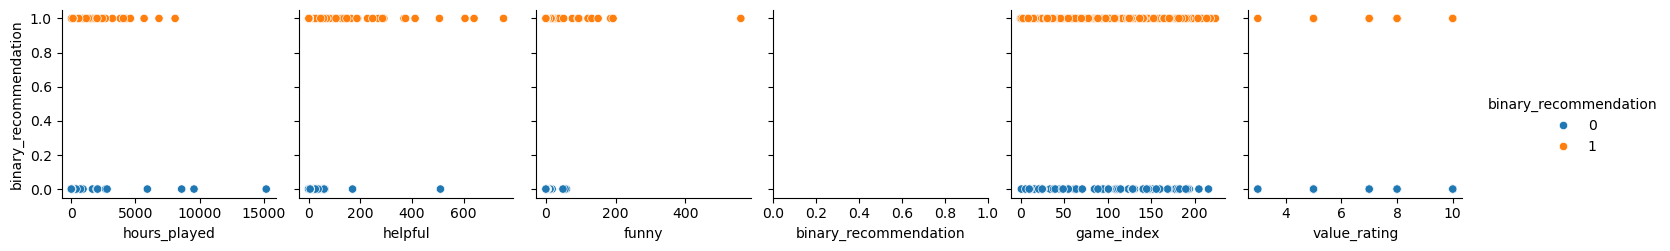

In [44]:
from seaborn import pairplot
pair_df = reviews_df.drop(['recommendation', 'game_name'], axis=1)
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(len(pair_df)), size=500, replace=False)
sns.pairplot(data = pair_df.iloc[indices], y_vars="binary_recommendation", x_vars = pair_df, hue="binary_recommendation")
plt.show()

# Naive Bayes
#### Data Splitting

In [45]:
from sklearn.model_selection import train_test_split
def get_train_valid_test_data(
    X: np.ndarray, 
    y: np.ndarray, 
):
    """ Randomizes and then splits the data into train, validation, and test sets.

        Args:
            X: Data given as a 2D matrix

            y: Labels given as a vector 
    """
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=.8, random_state=42)
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=.8, random_state=42)

    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

#### Preprocess Data

In [46]:
def get_preprocessed_data(drop_features: List[str] = None) -> Tuple[np.ndarray]:
    """ Gets preprocessed data for training, validation, and testing
        Args:
            drop_features: List of feature names to drop from iris.data.
            
        Return:
            A tuple of NumPy arrays where indices 0-1 
            contain the training data/targets, indices 2-3
            contain the validation data/targets, and 4-5
            contain the testing data/targets.
    """
    X = all_reviews_df.copy()
    y = target_df.copy()

    y = np.array(y)
    if drop_features is not None:
        X = X.drop(columns=drop_features)
    
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_train_valid_test_data(X.values, y)
    # Reshape targets to be 2D column vectors
    return X_trn, y_trn.reshape(-1, 1), X_vld, y_vld.reshape(-1, 1), X_tst, y_tst.reshape(-1, 1)

#### Plots/Metrics

In [47]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix
)

In [48]:
def plot_confusion_matrix(
    y: np.ndarray, 
    y_hat: np.ndarray, 
    class_names: Dict[int, str] = None
) -> pd.DataFrame:
    """ Plots a pretty and labeld version of Sklerarn's confusion matrix

        Args:
            y: Ground truth labels given as a 1D vector

            y_hat: Predicted labels given as a 1D vector

            class_names: Dictionary mapping labels to class names.

                Example: {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

        Returns:
            A confusion matrix casted as a DataFrame
    """
    y =  y.flatten() # reshape to make 1D vector for consistency
    y_hat = y_hat.flatten() # reshape to make 1D vector for consistency
    
    cfm = confusion_matrix(y_true=y, y_pred=y_hat)    
    
    labels = np.sort(np.unique(y))
    if class_names is not None:
        classes = []
        for l in labels:
            class_name = class_names.get(l, l)
            classes.append(class_name)
        labels = classes
        
    columns, index = labels, labels
    cfm_df = pd.DataFrame(cfm, index=index, columns=columns)
    sns.heatmap(cfm_df, annot=True)
    plt.show()
    return cfm_df

### Coding Gaussian Naive Bayes 
#### Computing log priors: $\log P(Y)$

In [49]:
def compute_log_priors(y: np.ndarray) -> np.ndarray:
    """ Computes the log priors for each class
    
        Args:
            y: The labels/tagets given as a vector. 

        Returns:
            1D vector of log priors for each class in ascending order labels.
    """
    class_labels, class_counts = np.unique(y, return_counts=True)
    log_priors = np.log(class_counts / len(y))
    return log_priors

#### Computing log likelihoods: $\log P(X | Y)$

In [50]:
from scipy.stats import norm
def log_gaussian(
    x: np.ndarray, 
    mu: Union[np.ndarray, float], 
    sigma: Union[np.ndarray, float],
) -> np.ndarray:
    """ Computes the value at a given point in a Gaussian distribution
    
        Args:
            x: Data given as a NumPy a matrix or vector.
            
            mu: Feature means given as a NumPy vector or float.
            
            sigma: Feature standard deviations given as a NumPy vector or float.
            
        Returns:
            A NumPy array of feature log liklihoods equal to the shape of x.
    """
    gaussian = norm(mu, sigma)
    log_likelihoods = gaussian.logpdf(x)
    ins1 = (2 * np.pi * sigma ** 2)
    p1 = -(1/2) * np.log(ins1)
    ins2 = (x - mu) / sigma
    p2 = ins2 ** 2
    p3 = p2 * 0.5
    p4 = p1 - p3
    return p4 

#### Computing parameters: $\mu$ and $\sigma$

In [51]:
def compute_parameters(
    X: np.ndarray, 
    y: np.ndarray,
) -> Tuple[np.ndarray, np.ndarray]:
    """ Computes the means and standard deviations for classes and features
    
        Args:
            X: Data given as a 2D matrix 
            
            y: Labels given as a 2D column vector

        Returns:
            Two NumPy arrays corresponding to the mean and STDs for each class and feature,
            such that each array has the shape (|K|, N).
    """
    means = []
    stds = []
    K = None
    K = np.unique(y)
    for k in K:
        class_k_locs = np.where(y == k)[0]
        class_k_mean = X[class_k_locs].mean(axis=0)
        means.append(class_k_mean)
        class_k_std = X[class_k_locs].std(axis=0)
        stds.append(class_k_std)
    stds = np.array(stds)
    means = np.array(means)
    return means, stds

#### Computing log likelihoods

In [52]:
def compute_log_likelihoods(X, means, stds, verbose=True):
    """ Computes the log likelihoods for all classes and data samples
    
        Args:
            X: Data to compute log likelihoods given as a matrix.
            
            means: Means for each class and feature of shape (|K|, N).
            
            stds: Standard deviations for each class and feature of shape (|K|, N).

        Returns:
            NumPy matrix containing ALL class log likelihoods with shape (M, |K|) where
            M is the number of data samples in the passed data X and |K| is the number 
            of classes given by the number of rows in means and stds.
    """
    log_likelihoods = []
    for mean, std in zip(means, stds):
        feature_log_likelihoods = log_gaussian(X, mean, std)
        class_log_likelihoods = np.sum(feature_log_likelihoods, axis=1, keepdims=False)
        log_likelihoods.append(class_log_likelihoods)
    log_likelihoods = np.array(log_likelihoods).T
    
    return log_likelihoods
   

#### GaussianNaiveBayes Class

In [53]:
class GaussianNaiveBayes():
    """ Performs multi-classifcation using Gaussian Naive Bayes

        Attributes:
            log_priors: The log of the priors computed based on the training data 

            means: The means for each class and every feature with shape (|K|, N).

            stds: The standard deviations for each class and every feature 
                with shape (|K|, N).
    """
    def __init__(self):
        self.log_priors = None
        self.means = None
        self.stds = None
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> object:
        """ Compute the log_priors, means, and STDs using training data.
        
            Args:
                X: Training data given as a 2D matrix

                y: Training labels given as a 2D column vector
                
            Returns:
                The class's own object reference. 
        """
        self.log_priors = compute_log_priors(y)
        self.means, self.stds = compute_parameters(X, y)
        return self
        
    def predict(self, X: np.ndarray):
        """ Make a prediction using log maximum a posteriori (MAP)
        
            Args:
                X: Data given as a 2D matrix.

            Returns:
                Preductions given as a 2D column vctor.
        """
        log_like = compute_log_likelihoods(X, self.means, self.stds)
        pred = log_like + self.log_priors
        pred = np.argmax(pred, axis=1, keepdims=True)
        return pred

##### Training

Accuracy: 0.8114483345604875


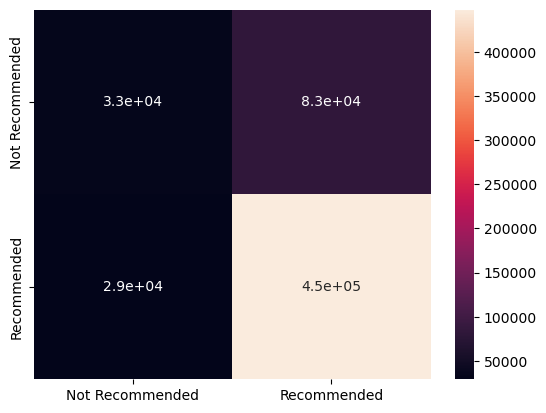

,Not Recommended,Recommended
Not Recommended,32673,82568
Recommended,29084,447831


In [54]:
class_names = {
        0: 'Not Recommended',
        1: 'Recommended'
    }
#Data Loading
#Load the training, validation, and test datasets.
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data()

#Training
#Initialize an instance of GaussianNaiveBayes() and fit it on the training data.
gnb = GaussianNaiveBayes()
gnb.fit(X_trn, y_trn)
y_hat = gnb.predict(X_trn)

#Compute and display the training accuracy.
acc = accuracy_score(y_trn, y_hat)
print(f"Accuracy: {acc}")

#Plot the confusion matrix for the training data.
plot_confusion_matrix(y_trn, y_hat, class_names)

##### Validation

Accuracy: 0.8133059531609914


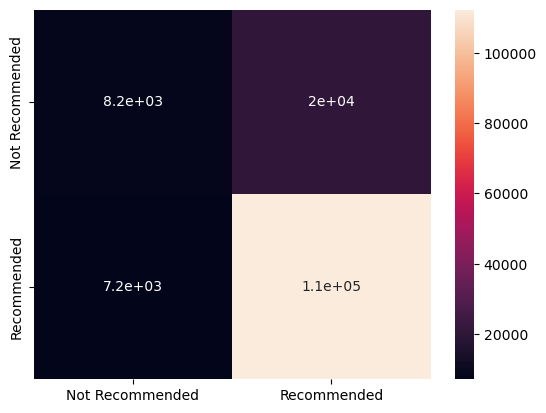

,Not Recommended,Recommended
Not Recommended,8162,20485
Recommended,7153,112239


In [55]:
#Compute and display the validation accuracy.
y_hat = gnb.predict(X_vld)
acc = accuracy_score(y_vld, y_hat)
print(f"Accuracy: {acc}")

#Plot the confusion matrix for the validation data.
plot_confusion_matrix(y_vld, y_hat, class_names)

##### Testing

Accuracy: 0.8121308410204865


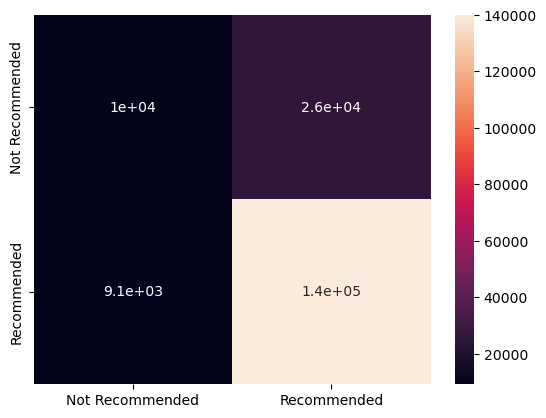

,Not Recommended,Recommended
Not Recommended,10144,25635
Recommended,9130,140140


In [56]:
#Compute and display the testing accuracy.
y_hat = gnb.predict(X_tst)
acc = accuracy_score(y_tst, y_hat)
print(f"Accuracy: {acc}")

#Plot the confusion matrix for the testing data.
plot_confusion_matrix(y_tst, y_hat, class_names)

# Logistic Regression
#### Preprocess data

In [57]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
def get_preprocessed_data() -> Tuple[np.ndarray]:
    """ Gets preprocessed data for training, validation, and testing

        Return:
            A tuple of NumPy arrays where indices 0-1 
            contain the training data/targets, indices 2-3
            contain the validation data/targets, and 4-5
            contain the testing data/targets.
    """
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst= None, None, None, None, None, None
    X = all_reviews_df.copy()
    y = target_df.copy()
    y = np.array(y)
    #Using this for reference https://www.geeksforgeeks.org/ml-one-hot-encoding/
    enc = OneHotEncoder(sparse_output=False)
    onehoty = enc.fit_transform(y.reshape(-1, 1))
    
    #Took from prev, split
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, onehoty, train_size=.8, random_state=42)
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=.8, random_state=42)
    
    #Standardize
    scaler = StandardScaler()
    scaler.fit(X_trn)
    X_trn = scaler.transform(X_trn)
    X_vld = scaler.transform(X_vld)
    X_tst = scaler.transform(X_tst)
                            
    #Bias
    bias = np.ones((X_trn.shape[0], 1))
    X_trn = np.hstack((bias, X_trn))
    bias = np.ones((X_vld.shape[0], 1))
    X_vld = np.hstack((bias, X_vld))
    bias = np.ones((X_tst.shape[0], 1))
    X_tst = np.hstack((bias, X_tst))
    
    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

#### Plots

In [58]:
def plot_decision_boundary(
    softreg: object, 
    X: np.ndarray, 
    y: np.ndarray,
    xlabel: str = '',
    ylabel: str = '',
    class_names: Dict = None
) -> None:
    """ Plots the decision boundry for data with 2 features. 
    
        Warning: 
            If you have more than 2 features (2D data) the decision boundry
            can not be plotted.
    
        Args:
            softreg: An instance of SoftmaxRegression class
            
            X: Data to be plotted

            y: Labels for corresponding data

            xlabel: X-axis label for plot

            ylabel: Y-axis label for plot
            
            class_names: Dictionary mapping labels to class names.

                Example: {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
    """
    assert X.shape[-1] == 2, f"`X` must have 2 features not {X.shape[-1]}"
        
    if class_names is None:
        class_names = {}

    # Generate fake data to cover entire space of our input features X
    buffer = .5
    x_min, x_max = X[:, 0].min() - buffer, X[:, 0].max() + buffer
    y_min, y_max = X[:, 1].min() - buffer, X[:, 1].max() + buffer
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                         np.arange(y_min, y_max, .02))
    fake_data = np.c_[xx.ravel(), yy.ravel()].reshape(-1,2)
    fake_data =  np.hstack([np.ones((len(fake_data), 1)), fake_data])
    # Make prediction
    y_hat = softreg.predict(fake_data)

    # Plot
    plt.contourf(xx, yy, y_hat.reshape(xx.shape))
    
    labels = np.unique(y)
    for l in labels:
        class_locs = np.where(y == l)[0]
        class_name = class_names.get(l, f'class {l}')
        plt.scatter(X[class_locs, 0], X[class_locs, 1], label=class_name)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

#### Sigmoid and Softmax

In [59]:
def sigmoid(z: np.ndarray) -> np.ndarray:
    #Referenced https://www.geeksforgeeks.org/implement-sigmoid-function-using-numpy/ since I wasn't sure about what to use for e
    sigmoid = (np.exp(z))/(1 + np.exp(z)) 
    return sigmoid

In [60]:
def softmax(z: np.ndarray) -> np.ndarray:
    """ Computes the stablized version of the softmax

        Args:
            z: A vector or matrix of continuous values.

        Return:
            A NumPy array with the same shape as the input.
    """
    z_max = np.max(z, axis=1, keepdims=True)
    num_exp = z - z_max
    numerator = np.exp(num_exp)
    denominator = np.sum(numerator, axis=1, keepdims=True)
    softmax = numerator/denominator
    return softmax

#### Negative Log Likelihood (NLL)

In [61]:
def nll_loss(y: np.ndarray, probs: np.ndarray) -> float:
    """ Computes the average generalized NLL Loss

        Args:
            y: The ground truth one-hot encoded labels
                given as matrix of shape (M, |K|).

            probs: The predicted probabilities for the
                corresponding labels given as a matrix
                of shape (M, |K|)
    """
    pred = y * np.log(probs)
    preds = np.sum(pred)
    nll = preds / (-1 * len(y))
    return nll

## Coding Softmax Regression

In [62]:
def get_batches(
    data_len: int, 
    batch_size: int = 32,
) -> List[np.ndarray]:
    """ Generates mini-batches based on the data indexes
        
        Args:
            data_len: Length of the data or number of data samples 
                in the data. This is used to generate the indices of
                the data.
            
            batch_size: Size of each mini-batch where the last mini-batch
                might be smaller than the rest if the batch_size does not 
                evenly divide the data length.

        Returns:
            A list of NumPy array's holding the indices of batches
    """
    indices = np.arange(data_len)
    np.random.shuffle(indices)
    batches = [indices[i:i+batch_size] for i in range(0, data_len, batch_size)]

    return batches

In [63]:
class SoftmaxRegression():
    """ Performs softmax regression using gradient descent
    
        Attributes:

            alpha: learning rate or step size.
                
            batch_size: Size of mini-batches for mini-batch gradient
                descent.
            
            epochs: Number of epochs to run for mini-batch
                gradient descent.
                
            seed: Seed to be used for NumPy's RandomState class
                or universal seed np.random.seed() function.

            W: Matrix of weights with shape (N, |K|) 

            trn_loss: Stores the training loss for each epoch.

            vld_loss: Stores the validation loss for each epoch.
    """
    def __init__(
        self, 
        alpha: float,
        batch_size: int,
        epochs: int = 1,
        seed: int = 0,
    ):

        self.alpha = alpha
        self.batch_size = batch_size
        self.epochs = epochs
        self.seed = seed
        
        self.W = None
        self.trn_loss = None
        self.vld_loss = None
    
    def fit(
         self, 
         X: np.ndarray, 
         y: np.ndarray, 
         X_vld: np.ndarray=None, 
         y_vld: np.ndarray=None
     ) -> object:
        """
            Args:
                X: Training features/data
                y: Training labels
                X_vld: Validation features/data
                y_vld: Validation labels
                seed: Seed used for initializing weights
        """
        # Set seed for reproducibility
        np.random.seed(self.seed)
        # Track training/validation loss
        self.trn_loss = []
        self.vld_loss = []

        num_features = X.shape[1]
        num_classes = y.shape[1]
        self.W = np.random.rand(num_features, num_classes)
        
        for e in range(self.epochs):
            batches = get_batches(X.shape[0], self.batch_size)
            for i in batches:
                Z = X[i] @ (self.W)
                y_probs = softmax(Z)
                B = X[i].shape[0]
                self.W = self.W - self.alpha * ((1/B) * X[i].T.dot(y_probs - y[i]))
            
            fXW = softmax(X.dot(self.W))
            nll = nll_loss(y, fXW)
            self.trn_loss.append(nll)
            
            if (X_vld is not None) and (y_vld is not None):
                fvld = softmax(X_vld.dot(self.W))
                nll_fvld = nll_loss(y_vld, fvld)
                self.vld_loss.append(nll_fvld)

        return self
        
    def predict(self, X: np.ndarray) -> np.ndarray:
        """ Make predictions using learned weights

            Args:
                X: Testing data given as a 2D matrix

            Returns:
                A 2D column vector of predictions for each data sample in X
        """
        pred = np.argmax((X @ self.W), axis=1, keepdims=True)
        return pred

##### Training

Training Accuracy: 0.8150115847850904


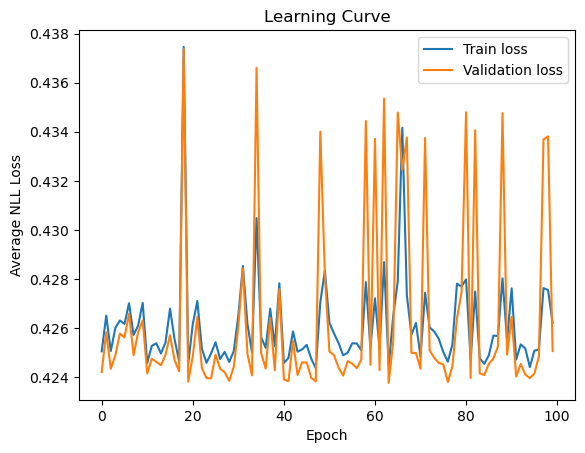

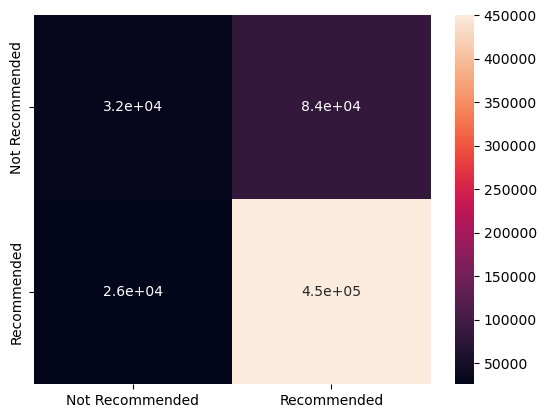

,Not Recommended,Recommended
Not Recommended,31732,83509
Recommended,26033,450882


In [64]:
class_names = {
        0: 'Not Recommended',
        1: 'Recommended'
    }
#Data loading
#Load the training, validation, and test datasets.
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data()

#Training
#Initialize an instance of SoftmaxRegression() and fit it on the training data.
softreg = SoftmaxRegression(epochs=100, batch_size=32, alpha=.1, seed=42)
softreg.fit(X_trn, y_trn, X_vld=X_vld, y_vld=y_vld)
y_hat = softreg.predict(X_trn)

#Compute and display the training accuracy.
train_acc = accuracy_score(np.argmax(y_trn, axis=1), y_hat)
print(f"Training Accuracy: {train_acc}")

#Plot the learning curve, which should include the training and validation losses for each epoch.
plt.plot(softreg.trn_loss, label='Train loss')
plt.plot(softreg.vld_loss, label='Validation loss')
plt.title("Learning Curve")
plt.ylabel("Average NLL Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()
    
#Plot the confusion matrix for the training data.
plot_confusion_matrix(np.argmax(y_trn, axis=1), y_hat, class_names)

##### Validation

Validation Accuracy: 0.816622646734982


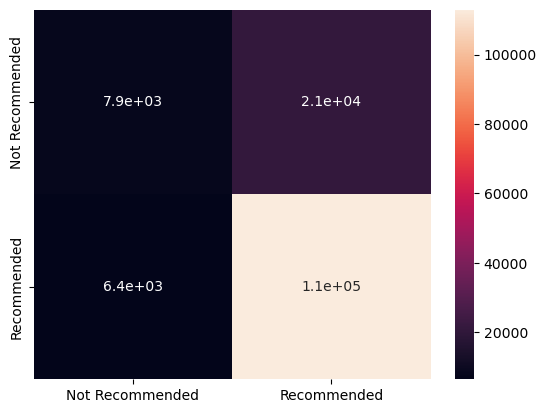

,Not Recommended,Recommended
Not Recommended,7931,20716
Recommended,6431,112961


In [65]:
y_hat = softreg.predict(X_vld)

#Compute and display the validation accuracy.
vld_acc = accuracy_score(np.argmax(y_vld, axis=1), y_hat)
print(f"Validation Accuracy: {vld_acc}")

#Plot the confusion matrix for the validation data.
plot_confusion_matrix(np.argmax(y_vld, axis=1), y_hat, class_names)

##### Testing

Validation Accuracy: 0.8156380202000552


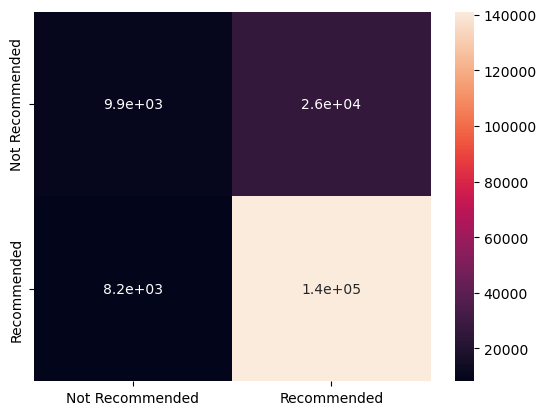

,Not Recommended,Recommended
Not Recommended,9854,25925
Recommended,8191,141079


In [66]:
y_hat = softreg.predict(X_tst)

#Compute and display the testing accuracy.
tst_acc = accuracy_score(np.argmax(y_tst, axis=1), y_hat)
print(f"Validation Accuracy: {tst_acc}")

#Plot the confusion matrix for the testing data.
plot_confusion_matrix(np.argmax(y_tst, axis=1), y_hat, class_names)

# Results and Conclusion
Both Logistic Regression and Naive Bayes were used in order to try to predict whether or not a user recommended or did not recommend a game. Logistic regression appears to have a slightly higher accuracy when comparing the two, but they are really close.

It is interesting to see how many things are not sorted correctly, yet it still has a decently high accuracy.

The main thing that I learned was how to edit data in order to use it. I used two separate tables from the dataset I chose, and it was a bit difficult to figure out what was and was not necessary. I am somewhat curious as to whether or not the date that the user created a review would help increase the accuracy, but I was unable to figure out how to properly implement that. I tried at one point to use the genre tags to see if things would be different, but the accuracy went way down so I fixed it. The other thing I learned was how to adjust the code from previous assignments in order to use different data. I reused a lot of code from our previous assignments to figure out the format for this, and I had to make a few changes since some things simply would not work.

I think it would be interesting to see if different genres tend to have better/worse reviews. I also think it would have been fun to see if any genres tended to have more playtime than others. 

# References
Original Dataset:
https://www.kaggle.com/datasets/mohamedtarek01234/steam-games-reviews-and-rankings?select=steam_game_reviews.csv

Homeworks from class:
*  Derivatives and Ordinary Least Squares
*  Naive Bayes
*  Data Exploration
*  Logistic Regression

Outside sources:
* https://www.geeksforgeeks.org/ml-one-hot-encoding/
* https://stackoverflow.com/questions/56947333/how-to-remove-commas-from-all-the-column-in-pandas-at-once
* https://www.geeksforgeeks.org/difference-between-eval-and-ast-literal-eval-in-python/
* https://www.geeksforgeeks.org/implement-sigmoid-function-using-numpy/
